<a href="https://colab.research.google.com/github/ShuvroWritesCode/Generative-AI-for-Developers---freeCodeCamp/blob/main/Text_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset:

https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [ ]:
import pandas as pd

In [ ]:
!pwd

/content


In [ ]:
data_path = "/content/IMDB Dataset.csv"

In [ ]:
df = pd.read_csv(data_path)

In [ ]:
df.shape

(50000, 2)

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df = df.head(100)

In [ ]:
df.shape

(100, 2)

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Data Preprocessing

## Lower Case Operation

In [ ]:
df['review'][3]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

In [ ]:
df['review'] = df['review'].str.lower()

In [ ]:
df['review'][3]

"basically there's a family where a little boy (jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />this movie is slower than a soap opera... and suddenly, jake decides to become rambo and kill the zombie.<br /><br />ok, first of all when you're going to make a film you must decide if its a thriller or a drama! as a drama the movie is watchable. parents are divorcing & arguing like in real life. and then we have jake with his closet which totally ruins all the film! i expected to see a boogeyman similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. as for the shots with jake: just ignore them."

**Difference after lower case operation:**

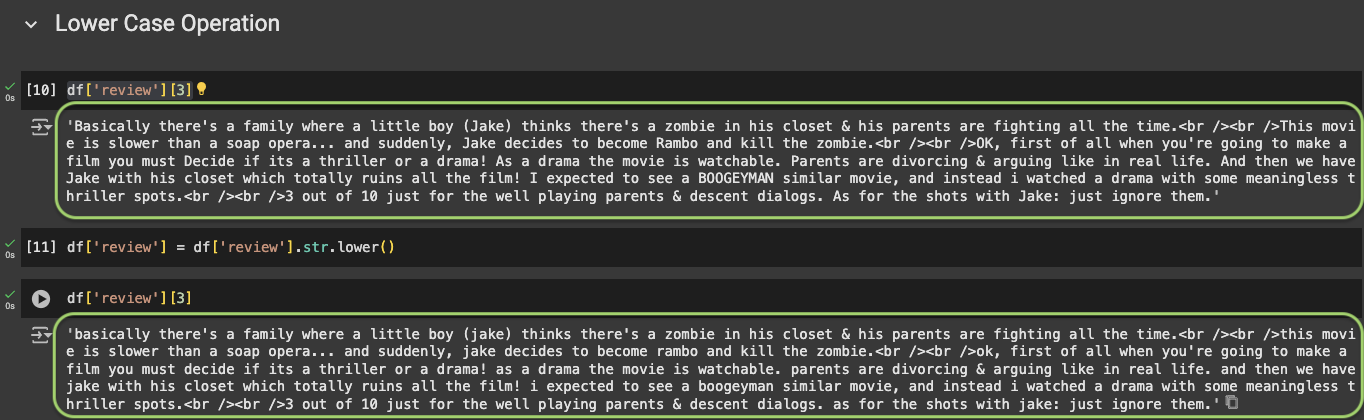

In [ ]:
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
95,daniel day-lewis is the most versatile actor a...,positive
96,my guess would be this was originally going to...,negative
97,"well, i like to watch bad horror b-movies, cau...",negative
98,"this is the worst movie i have ever seen, as w...",negative


In [ ]:
# prompt: write a python code using regex to remove all HTML tags from the loaded dataset.

import re

def remove_html_tags(text):
  clean = re.compile('<.*?>')
  return re.sub(clean, '', text)


In [ ]:
df['review'] = df['review'].apply(remove_html_tags)

In [ ]:
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
95,daniel day-lewis is the most versatile actor a...,positive
96,my guess would be this was originally going to...,negative
97,"well, i like to watch bad horror b-movies, cau...",negative
98,"this is the worst movie i have ever seen, as w...",negative


## Remove URL

In [ ]:
# prompt: write a python code using regex to remove all URL from the dataset.

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [ ]:
df['review'] = df['review'].apply(remove_urls)

In [ ]:
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
95,daniel day-lewis is the most versatile actor a...,positive
96,my guess would be this was originally going to...,negative
97,"well, i like to watch bad horror b-movies, cau...",negative
98,"this is the worst movie i have ever seen, as w...",negative


## Punctuation Handling

In [ ]:
import string
exclude = string.punctuation

In [ ]:
def remove_punc(text):
  return text.translate(str.maketrans('', '', exclude))

In [ ]:
df['review'][5]

'probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause, but it\'s not preachy or boring. it just never gets old, despite my having seen it some 15 or more times in the last 25 years. paul lukas\' performance brings tears to my eyes, and bette davis, in one of her very few truly sympathetic roles, is a delight. the kids are, as grandma says, more like "dressed-up midgets" than children, but that only makes them more fun to watch. and the mother\'s slow awakening to what\'s happening in the world and under her own roof is believable and startling. if i had a dozen thumbs, they\'d all be "up" for this movie.'

In [ ]:
remove_punc(df['review'][5])

'probably my alltime favorite movie a story of selflessness sacrifice and dedication to a noble cause but its not preachy or boring it just never gets old despite my having seen it some 15 or more times in the last 25 years paul lukas performance brings tears to my eyes and bette davis in one of her very few truly sympathetic roles is a delight the kids are as grandma says more like dressedup midgets than children but that only makes them more fun to watch and the mothers slow awakening to whats happening in the world and under her own roof is believable and startling if i had a dozen thumbs theyd all be up for this movie'

## Chat keywords handling

Here, we will try to handle different shortcuts and keywords that we use in our day to day chats on social media.

In [ ]:
chat_words = {
    'AFAIK':'As Far As I Know',
    'AFK':'Away From Keyboard',
    'ASAP':'As Soon As Possible',
    "FYI": "For Your Information",
    "ASAP": "As Soon As Possible",
    "BRB": "Be Right Back",
    "BTW": "By The Way",
    "OMG": "Oh My God",
    "IMO": "In My Opinion",
    "LOL": "Laugh Out Loud",
    "TTYL": "Talk To You Later",
    "GTG": "Got To Go",
    "TTYT": "Talk To You Tomorrow",
    "IDK": "I Don't Know",
    "TMI": "Too Much Information",
    "IMHO": "In My Humble Opinion",
    "ICYMI": "In Case You Missed It",
    "AFAIK": "As Far As I Know",
    "BTW": "By The Way",
    "FAQ": "Frequently Asked Questions",
    "TGIF": "Thank God It's Friday",
    "FYA": "For Your Action",
    "ICYMI": "In Case You Missed It",
}

In [ ]:
# prompt: write a python script to replace all the chat_words into its full form within provided string (text)

def chat_words_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words:
            new_text.append(chat_words[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

In [ ]:
chat_words_conversion('Do this work ASAP')

'Do this work As Soon As Possible'

## Incorrect text handling

Handling the spelling mistakes and mistyped words.

In [ ]:
# prompt: write a python code to handle all mispelled words using python and textblob module

from textblob import TextBlob

def spelling_correction(text):
    blob = TextBlob(text)
    return blob.correct()

In [ ]:
df['review'] = df['review'].apply(spelling_correction)

## Stopwords

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# prompt: write a function to remove all stopwords from the dataset review

def remove_stopwords(text):
    stop_words = stopwords.words('english')
    words = text.split()
    new_text = [w for w in words if w not in stop_words]
    return " ".join(new_text)

In [ ]:
df['review'] = df['review'].apply(remove_stopwords)

In [ ]:
df

,review,sentiment
0,one reviews mentioned watching 1 oz episode ho...,positive
1,wonderful little production. filling technique...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically there's family little boy (jake) thi...,negative
4,"letter matter's ""love time money"" usually stun...",positive
...,...,...
95,daniel day-lewis versatile actor alive. englis...,positive
96,"guess would originally going least two parts, ...",negative
97,"well, like watch bad horror b-moves, cause thi...",negative
98,"worst movie ever seen, well as, worst probably...",negative


## Removing the Emoji(s)

In [ ]:
import re

def remove_emojis(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
df['review'] = df['review'].apply(remove_emojis)

In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 6.5 MB/s eta 0:00:00


In [ ]:
import emoji

In [ ]:
df['review'] = emoji.demojize(df['review'])

In [ ]:
df

,review,sentiment
0,one reviews mentioned watching 1 oz episode ho...,positive
1,one reviews mentioned watching 1 oz episode ho...,positive
2,one reviews mentioned watching 1 oz episode ho...,positive
3,one reviews mentioned watching 1 oz episode ho...,negative
4,one reviews mentioned watching 1 oz episode ho...,positive
...,...,...
95,one reviews mentioned watching 1 oz episode ho...,positive
96,one reviews mentioned watching 1 oz episode ho...,negative
97,one reviews mentioned watching 1 oz episode ho...,negative
98,one reviews mentioned watching 1 oz episode ho...,negative


## Tokenization

### Using the Split Function

In [ ]:
# Words tokenization
sent1 = "I am going to Delhi"
sent1.split()

['I', 'am', 'going', 'to', 'Delhi']

In [ ]:
# Sentence tokenization
sent2 = "I am going to Europe. I am going to stay there for a month. I will be back soon."
sent2.split('.')

['I am going to Europe',
 ' I am going to stay there for a month',
 ' I will be back soon',
 '']

There are many other tokenizing techniques using nltk, regex, etc.

## Stemmer

Stemmer is basically digging out the root words out of the data for better optimized calculations later.

In [ ]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

def stem_words(text):
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    return " ".join(stemmed_words)

In [ ]:
sample = "walk walks walking walked"
stem_words(sample)

'walk walk walk walk'

In [ ]:
df['review'] = df['review'].apply(stem_words)

KeyboardInterrupt: 

## Lemmatization

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
import nltk

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
nltk.download('punkt_tab')  # Download the necessary tokenizer

sentence = "He was running and eating at same time. He has bad habit of swimming after playing long hours in the Sun."
punctuations="?:!.,;"
sentence_words = nltk.word_tokenize(sentence)
for word in sentence_words:
    if word in punctuations:
        sentence_words.remove(word)

sentence_words
print("{0:20}{1:20}".format("Word","Lemma"))
for word in sentence_words:
    print ("{0:20}{1:20}".format(word,wordnet_lemmatizer.lemmatize(word,pos='v')))

Word                Lemma               
He                  He                  
was                 be                  
running             run                 
and                 and                 
eating              eat                 
at                  at                  
same                same                
time                time                
He                  He                  
has                 have                
bad                 bad                 
habit               habit               
of                  of                  
swimming            swim                
after               after               
playing             play                
long                long                
hours               hours               
in                  in                  
the                 the                 
Sun                 Sun                 


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


NOTE: Stemming & lamatization are same to retrieve root words but lamatization is worked good. Lamatization is slow & stemming is fast